In [1]:
import regex
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def task(func):
    files = os.listdir("ustawy")
    amount_per_bill = defaultdict(lambda: 0)
    for file_name in files:
        with open("ustawy" + '/' + file_name, 'r') as document:
            act_lines = document.readlines()
            for line in act_lines:
                amount_per_bill[int(file_name[:4])] += func(line)
    return amount_per_bill         

In [3]:
# 1. For each bill compute the number of the following amendments present in the bill:
# addition of a unit (e.g. dodaje się ust. 5a)
def count_all_the_additions_in_line(act_line):
    res = re.findall(r'dodaje się (ust|pkt)', act_line)
    return len(res)


def count_all_additions_per_year():
    amount_per_bill = task(count_all_the_additions_in_line)
    return amount_per_bill


all_additions_per_year = count_all_additions_per_year()
print(all_additions_per_year)

defaultdict(<function task.<locals>.<lambda> at 0x7fbcdc07aee0>, {1998: 134, 2002: 57, 2001: 689, 2000: 498, 2003: 611, 1996: 317, 1994: 53, 1995: 221, 2004: 711, 1997: 432, 1999: 120, 1993: 30})


In [4]:
# 1. For each bill compute the number of the following amendments present in the bill:
# removal of a unit (e.g. w art. 10 ust. 1 pkt 8 skreśla się)
def count_all_the_removals_in_line(act_line):
    res = re.findall(r'skreśla się', act_line)
    return len(res)


def count_all_removals_per_year():
    amount_per_bill = task(count_all_the_removals_in_line)
    return amount_per_bill


all_removals_per_year = count_all_removals_per_year()
print(all_removals_per_year)

defaultdict(<function task.<locals>.<lambda> at 0x7fbcdc07ab80>, {1998: 175, 2002: 5, 2001: 512, 2000: 629, 2003: 69, 1996: 432, 1994: 71, 1995: 161, 2004: 23, 1997: 490, 1999: 110, 1993: 23})


In [5]:
# 1. For each bill compute the number of the following amendments present in the bill:
# change of a unit (e.g. art. 5 otrzymuje brzmienie)
def count_all_the_changings_in_line(act_line):
    res = re.findall(r'\d+ otrzymuj(e|ą) brzmienie', act_line)
    return len(res)


def count_all_changings_per_year():
    amount_per_bill = task(count_all_the_changings_in_line)
    return amount_per_bill


all_changings_per_year = count_all_changings_per_year()
print(all_changings_per_year)

defaultdict(<function task.<locals>.<lambda> at 0x7fbcdc07aa60>, {1998: 299, 2002: 113, 2001: 1338, 2000: 1477, 2003: 1219, 1996: 864, 1994: 184, 1995: 368, 2004: 1119, 1997: 1041, 1999: 172, 1993: 59})


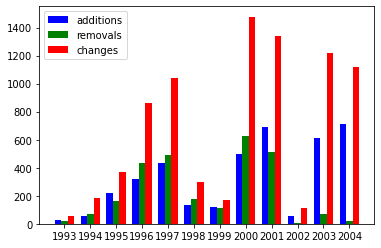

In [6]:
data = [[all_additions_per_year[year] for year in range(1993, 2005)],
[all_removals_per_year[year] for year in range(1993, 2005)],
[all_changings_per_year[year] for year in range(1993, 2005)]]
barWidth = 0.25
X = np.arange(12)
plt.bar(X + 0.00, data[0], color = 'b', width = barWidth, label='additions')
plt.bar(X + 0.25, data[1], color = 'g', width = barWidth, label='removals')
plt.bar(X + 0.50, data[2], color = 'r', width = barWidth, label='changes')
plt.xticks([r + barWidth for r in range(12)], [year for year in range(1993, 2005)])
plt.legend(loc='best')
plt.show()

In [7]:
# Defining forms of ustaw
base = r'\bustaw'
endings = ['a', 'y', 'ę', 'ą', 'ami', 'ie', 'ach', 'om', 'o']
forms = [base + ending + r'\b' for ending in endings]

In [8]:
# 4. Compute the total number of occurrences of the word ustawa in any inflectional form (ustawa, ustawie, ustawę, etc.) and all spelling forms (ustawa, Ustawa, USTAWA), excluding other words with the same prefix (e.g. ustawić).
def count_all_the_occurencies_in_line(act_line):
    return sum(len(re.findall(form, act_line.lower())) for form in forms)


def count_all_the_occurencies():
    amount_per_bill = task(count_all_the_occurencies_in_line)
    return amount_per_bill


all_the_occurencies = count_all_the_occurencies()
print(sum(all_the_occurencies.values()))

24183


In [9]:
# 5. Compute the total number of occurrences of the same word (same conditions), followed by z dnia expression.
def count_all_the_occurencies_followed_in_line(act_line):
    return sum(len(re.findall(rf"({form})(?= z dnia )", act_line.lower())) for form in forms)


def count_all_the_occurencies_followed():
    amount_per_bill = task(count_all_the_occurencies_followed_in_line)
    return amount_per_bill


all_the_occurencies_followed = count_all_the_occurencies_followed()
print(sum(all_the_occurencies_followed.values()))

6590


In [10]:
# 6. As above, but not followed by z dnia expression. Is the result correct (result 4 =? result 5 + result 6)?
def count_all_the_occurencies_not_followed_in_line(act_line):
    return sum(len(re.findall(rf"({form})(?! z dnia )", act_line.lower())) for form in forms)


def count_all_the_occurencies_not_followed():
    amount_per_bill = task(count_all_the_occurencies_not_followed_in_line)
    return amount_per_bill


all_the_occurencies_not_followed = count_all_the_occurencies_not_followed()
print(sum(all_the_occurencies_not_followed.values()))

17593


yes, result 4 =? result 5 + result 6

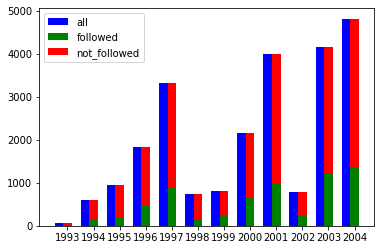

In [11]:
data = [[all_the_occurencies[year] for year in range(1993, 2005)],
[all_the_occurencies_followed[year] for year in range(1993, 2005)],
[all_the_occurencies_not_followed[year] for year in range(1993, 2005)]]
X = np.arange(12)
barWidth = 0.33
plt.bar(X , data[0], color = 'b', width = barWidth, label='all')
plt.bar(X + barWidth, data[1], color = 'g', width = barWidth, label='followed')
plt.bar(X + barWidth, data[2], color = 'r', width = barWidth, label='not_followed', bottom=data[1])
plt.xticks([r + barWidth for r in range(12)], [year for year in range(1993, 2005)])
plt.legend(loc='best')
plt.show()

In [12]:
# 7. Compute the total number of occurrences of the word ustawa in any inflectional form, excluding occurrences following o zmianie expression.
def count_all_the_occurencies_not_preceded_in_line(act_line):
    return sum(len(re.findall(rf"(?<!o zmianie )({form})", act_line.lower())) for form in forms)


def count_all_the_occurencies_not_preceded():
    amount_per_bill = task(count_all_the_occurencies_not_preceded_in_line)
    return amount_per_bill


all_the_occurencies_not_preceded = count_all_the_occurencies_not_preceded()
print(sum(all_the_occurencies_not_preceded.values()))

23433


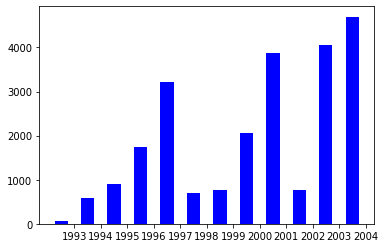

In [13]:
# 8. Plot results 4-7 using a bar chart.
data = [all_the_occurencies_not_preceded[year] for year in range(1993, 2005)]
X = np.arange(12)
barWidth = 0.5
plt.bar(X, data, color = 'b', width = barWidth)
plt.xticks([r + barWidth for r in range(12)], [year for year in range(1993, 2005)])
plt.show()